In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

eu28_passengers = pd.read_csv(r"datasets/eu28passengers.csv",header=0, index_col="Mode")
eu28_passengers = eu28_passengers.transpose()
eu28_passengers.head()

Mode,Passenger Cars,Powered 2-wheelers,Buses & Coaches,Railways,Tram & Metro,Air,Sea
1995,3934.8,116.4,502.7,350.3,73.7,347.9,44.4
1996,4003.0,118.0,507.2,348.8,74.9,368.0,44.0
1997,4087.2,122.0,509.0,349.8,75.7,392.1,43.6
1998,4191.0,126.1,516.1,350.7,76.9,411.2,43.1
1999,4306.8,129.9,518.3,358.5,78.5,427.3,42.6


In [2]:
railway_change = (eu28_passengers["Railways"].iloc[-1] - eu28_passengers["Railways"].iloc[0])/eu28_passengers["Railways"].iloc[0]
railway_change = str(round(railway_change,2)*100)
railway_change = "+" + railway_change.split('.')[0] + "%"

bus_change = (eu28_passengers["Buses & Coaches"].iloc[-1] - eu28_passengers["Buses & Coaches"].iloc[0])/eu28_passengers["Buses & Coaches"].iloc[0]
bus_change = str(round(bus_change,2)*100)
bus_change = "+" + bus_change.split('.')[0] + "%"

metro_change = (eu28_passengers["Tram & Metro"].iloc[-1] - eu28_passengers["Tram & Metro"].iloc[0])/eu28_passengers["Tram & Metro"].iloc[0]
metro_change = str(round(metro_change,2)*100)
metro_change = "+" + metro_change.split('.')[0] + "%"

car_change = (eu28_passengers["Passenger Cars"].iloc[-1] - eu28_passengers["Passenger Cars"].iloc[0])/eu28_passengers["Passenger Cars"].iloc[0]
car_change = str(round(car_change,2)*100)
car_change = "+" + car_change.split('.')[0] + "%"

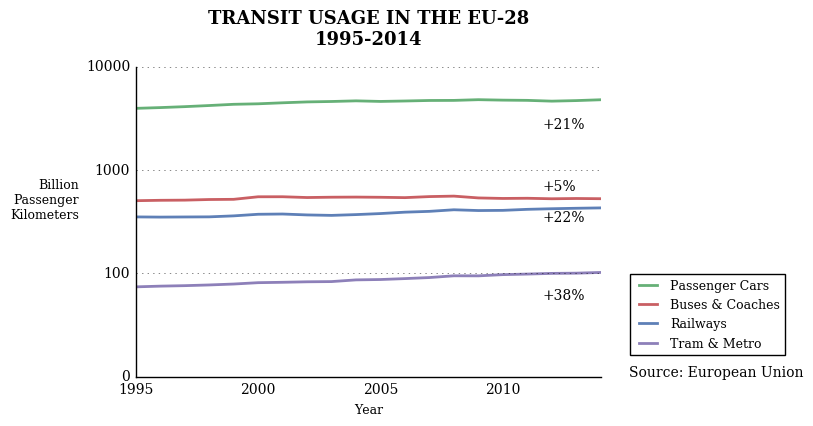

In [3]:
colors = ['#66b077','#c95f63','#5e80b7',"#8d80b9"]

eu_pubtrans = eu28_passengers.plot(y=["Passenger Cars","Buses & Coaches", "Railways", "Tram & Metro"], color = colors, legend=False, lw=2,logy=True)

plt.title("TRANSIT USAGE IN THE EU-28\n1995-2014",fontsize=13, family="serif",fontweight='bold')
eu_pubtrans.axes.title.set_position([.5, 1.05])
eu_pubtrans.axes.set_xlabel("Year",size=9, family="serif")
eu_pubtrans.axes.set_ylabel("Billion\nPassenger\nKilometers", rotation=0, ha="right",size=9, family="serif",)

# Remove top and right axes lines ("spines")
spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
    eu_pubtrans.spines[spine].set_visible(False)

eu_pubtrans.xaxis.set_ticks_position('none')
eu_pubtrans.yaxis.set_ticks_position('none')

eu_pubtrans.set_xticklabels(eu_pubtrans.get_xticklabels(), family="serif")
eu_pubtrans.set_yticklabels(('',0,100,1000,10000),family="serif")

eu_pubtrans.grid(color='black', linestyle=':', linewidth=0.5, axis='y', alpha=0.66)

eu_pubtrans.annotate(s=metro_change, xy=(.875,0.25), xycoords="axes fraction", family="serif")
eu_pubtrans.annotate(s=railway_change, xy=(.875,0.5), xycoords="axes fraction", family="serif")
eu_pubtrans.annotate(s=bus_change, xy=(.875,0.6), xycoords="axes fraction", family="serif")
eu_pubtrans.annotate(s=car_change, xy=(.875,0.8), xycoords="axes fraction", family="serif")

eu_pubtrans.plot()
# plt.tight_layout()
eu_pubtrans.legend(loc='center left', bbox_to_anchor=(1.05, 0.2), prop={"family":"serif", "size":9})
eu_pubtrans.annotate(s="Source: European Union", xy=(1.06,0), xycoords="axes fraction", family="serif")
plt.savefig("/Users/maxmealy/Documents/JHU AAP/Data Visualization/Week 4/eu28_alltransit.pdf", dpi = 200, bbox_inches='tight')